In [ ]:
import pandas as pd

user_data=[['alice',19,'F','student'],['john',26,'M','student']]
user_colums=['name','age','gender','job']
user1=pd.DataFrame(data=user_data,columns=user_colums)

user_data=dict(name=['eric','paul'],age=[22,58],gender=['M','F'],job=['student','manager'])
user2=pd.DataFrame(data=user_data)

user_data={'name':['peter','julie'],'age':[33,44],'gender':['M','F'],'job':['engineer','scientist']}
user3=pd.DataFrame(data=user_data)
dict_data=dict(name=['alice','john','eric','julie','alex'],height=[165,180,175,180,185])
print(dict_data)
user4=pd.DataFrame(data=dict_data)
user4

users = pd.concat([user1,user2,user3],ignore_index=True)
print(users)

{'name': ['alice', 'john', 'eric', 'julie', 'alex'], 'height': [165, 180, 175, 180, 185]}
    name  age gender        job
0  alice   19      F    student
1   john   26      M    student
2   eric   22      M    student
3   paul   58      F    manager
4  peter   33      M   engineer
5  julie   44      F  scientist


In [ ]:
users

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer
5,julie,44,F,scientist


In [ ]:

df = users.copy()
df = pd.concat([df, df  [df.index == 0]])
df = pd.concat([df, df [df.index == 2]])
df = pd.concat([df, df [df.index == 4]])
df.sort_values(by='age', ascending=True, inplace=True)
#df.index = range(0, len(df))
df

,name,age,gender,job
0,alice,19,F,student
0,alice,19,F,student
2,eric,22,M,student
2,eric,22,M,student
1,john,26,M,student
4,peter,33,M,engineer
4,peter,33,M,engineer
5,julie,44,F,scientist
3,paul,58,F,manager


In [ ]:
print(df.duplicated())
print(df.duplicated().sum())
print(sum(df.duplicated()))
df[df.duplicated()]

0    False
0     True
2    False
2     True
1    False
4    False
4     True
5    False
3    False
dtype: bool
3
3


,name,age,gender,job
0,alice,19,F,student
2,eric,22,M,student
4,peter,33,M,engineer


In [ ]:
df[~df.duplicated()]

,name,age,gender,job
0,alice,19,F,student
2,eric,22,M,student
1,john,26,M,student
4,peter,33,M,engineer
5,julie,44,F,scientist
3,paul,58,F,manager


In [ ]:
print(df.job.duplicated())
df[~df.duplicated()]

0    False
0     True
2     True
2     True
1     True
4    False
4     True
5    False
3    False
Name: job, dtype: bool


,name,age,gender,job
0,alice,19,F,student
2,eric,22,M,student
1,john,26,M,student
4,peter,33,M,engineer
5,julie,44,F,scientist
3,paul,58,F,manager


In [ ]:
df[df[['job','gender']].duplicated()]

,name,age,gender,job
0,alice,19,F,student
2,eric,22,M,student
1,john,26,M,student
4,peter,33,M,engineer


In [ ]:
df.drop_duplicates(inplace=True)
df.index = range(0,len(df))
df

,name,age,gender,job
0,alice,19,F,student
1,eric,22,M,student
2,john,26,M,student
3,peter,33,M,engineer
4,julie,44,F,scientist
5,paul,58,F,manager


In [ ]:
#inner_join : all matching rows from both dataframes
inner_join=pd.merge(users,user4,on='name',how='inner')   #by default inner join  #how is the explicit method
inner_join

,name,age,gender,job,height
0,alice,19,F,student,165
1,john,26,M,student,180
2,eric,22,M,student,175
3,julie,44,F,scientist,180


In [ ]:
merge_right=pd.merge(users,user4,on='name',how='right')
merge_right

,name,age,gender,job,height
0,alice,19.0,F,student,165
1,john,26.0,M,student,180
2,eric,22.0,M,student,175
3,julie,44.0,F,scientist,180
4,alex,NaN,NaN,NaN,185


In [ ]:
outer_join=pd.merge(users,user4,how='outer',on='name')
outer_join

,name,age,gender,job,height
0,alex,NaN,NaN,NaN,185.0
1,alice,19.0,F,student,165.0
2,eric,22.0,M,student,175.0
3,john,26.0,M,student,180.0
4,julie,44.0,F,scientist,180.0
5,paul,58.0,F,manager,NaN
6,peter,33.0,M,engineer,NaN


In [ ]:
left_join=pd.merge(users,user4,on='name',how='left')
left_join

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,NaN
4,peter,33,M,engineer,NaN
5,julie,44,F,scientist,180.0


In [ ]:
df.describe()

,age
count,6.000000
mean,33.666667
std,14.895189
min,19.000000
25%,23.000000
50%,29.500000
75%,41.250000
max,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   age     6 non-null      int64 
 2   gender  6 non-null      object
 3   job     6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [ ]:
df.isnull()

,name,age,gender,job
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False


In [ ]:
df.notnull()

,name,age,gender,job
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True


In [ ]:
df=left_join.copy()
df.dropna(inplace=True)
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
5,julie,44,F,scientist,180.0


In [ ]:
df= left_join.copy()
df.dropna(inplace=True,how='all')
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,NaN
4,peter,33,M,engineer,NaN
5,julie,44,F,scientist,180.0


In [ ]:
#startergy -2: filling up the missing values
df=left_join.copy()
df.fillna(0,inplace=True)
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,0.0
4,peter,33,M,engineer,0.0
5,julie,44,F,scientist,180.0


In [ ]:
df=left_join.copy()
avg_height=df.height.mean()
print(avg_height)
df.height.fillna(avg_height,inplace=True)
df

175.0


/tmp/ipython-input-3499019604.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.height.fillna(avg_height,inplace=True)


,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,175.0
4,peter,33,M,engineer,175.0
5,julie,44,F,scientist,180.0


In [ ]:
df=left_join.copy()
avg_height=df.height.median()
print(avg_height)
df.height.fillna(avg_height,inplace=True)
df

177.5


/tmp/ipython-input-2762862439.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.height.fillna(avg_height,inplace=True)


,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,177.5
4,peter,33,M,engineer,177.5
5,julie,44,F,scientist,180.0


In [ ]:
df= left_join.copy()
mode_height=df.height.mode()
print(mode_height,mode_height[0],type(mode_height))
print(mode_height[0],type(mode_height[0]))
df.fillna(mode_height[0],inplace=True)
df

0    180.0
Name: height, dtype: float64 180.0 <class 'pandas.core.series.Series'>
180.0 <class 'numpy.float64'>


,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,180.0
4,peter,33,M,engineer,180.0
5,julie,44,F,scientist,180.0


In [ ]:
df=left_join.copy()

print(df)
df.fillna(method='pad',inplace=True)
df

    name  age gender        job  height
0  alice   19      F    student   165.0
1   john   26      M    student   180.0
2   eric   22      M    student   175.0
3   paul   58      F    manager     NaN
4  peter   33      M   engineer     NaN
5  julie   44      F  scientist   180.0


/tmp/ipython-input-3237287240.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad',inplace=True)


,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,175.0
4,peter,33,M,engineer,175.0
5,julie,44,F,scientist,180.0


forward fill

backward fill

In [ ]:
df=left_join.copy()
print(df)
df.fillna(method='bfill',inplace=True)
df

    name  age gender        job  height
0  alice   19      F    student   165.0
1   john   26      M    student   180.0
2   eric   22      M    student   175.0
3   paul   58      F    manager     NaN
4  peter   33      M   engineer     NaN
5  julie   44      F  scientist   180.0


/tmp/ipython-input-2536036833.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,175.0
3,paul,58,F,manager,180.0
4,peter,33,M,engineer,180.0
5,julie,44,F,scientist,180.0


Scaling Up and Scaling Down

In [ ]:
df=users.copy()
df

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer
5,julie,44,F,scientist


In [ ]:
df.age=df.age * 10
df

,name,age,gender,job
0,alice,190,F,student
1,john,260,M,student
2,eric,220,M,student
3,paul,580,F,manager
4,peter,330,M,engineer
5,julie,440,F,scientist


In [ ]:
df.age=df.age / 10
df

,name,age,gender,job
0,alice,19.0,F,student
1,john,26.0,M,student
2,eric,22.0,M,student
3,paul,58.0,F,manager
4,peter,33.0,M,engineer
5,julie,44.0,F,scientist


**Renaming Columns**

In [ ]:
df=users.copy()
print(df.columns)
df.columns =['new_name','new_age','new_gender','new_job']
df.columns[3]
print(df.columns)
df

Index(['name', 'age', 'gender', 'job'], dtype='object')
Index(['new_name', 'new_age', 'new_gender', 'new_job'], dtype='object')


,new_name,new_age,new_gender,new_job
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer
5,julie,44,F,scientist


In [ ]:
df= users.copy()
df=df.rename(columns= {'name':'new_name','age':'new_age','gender': 'new_gender','job':'new_job'})
df


,new_name,new_age,new_gender,new_job
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer
5,julie,44,F,scientist


Groupby on Date Frame

In [ ]:
for group,data_frame in users.groupby('job'):
    print(group,type(group))
    print(data_frame)

engineer <class 'str'>
    name  age gender       job
4  peter   33      M  engineer
manager <class 'str'>
   name  age gender      job
3  paul   58      F  manager
scientist <class 'str'>
    name  age gender        job
5  julie   44      F  scientist
student <class 'str'>
    name  age gender      job
0  alice   19      F  student
1   john   26      M  student
2   eric   22      M  student


In [ ]:
for group,data_frame in users.groupby('gender'):
    print(group,type(group))
    print(data_frame)

F <class 'str'>
    name  age gender        job
0  alice   19      F    student
3   paul   58      F    manager
5  julie   44      F  scientist
M <class 'str'>
    name  age gender       job
1   john   26      M   student
2   eric   22      M   student
4  peter   33      M  engineer


In [ ]:
df=users.copy()
grouped_df=df.groupby('job').agg({'age':['sum','mean','max','min'],'gender':'count'})
grouped_df

age                    gender
          sum       mean max min  count
job                                    
engineer   33  33.000000  33  33      1
manager    58  58.000000  58  58      1
scientist  44  44.000000  44  44      1
student    67  22.333333  26  19      3

In [ ]:
df=users.copy()
grouped_df=df.groupby('gender').agg({'age':['sum','mean','max','min'],'job':'count'})
grouped_df

age                      job
        sum       mean max min count
gender                              
F       121  40.333333  58  19     3
M        81  27.000000  33  22     3

Reading Data onto Data Frame from External Source

In [ ]:
#reading from csv file
try:
    print("reading the data from csv file....")

    df=pd.read_csv("salary_table.csv")

except:
    print("file access error!")
    print("data file could not be read successfully....")
else:
    print("Data file has been read successfully")
df

reading the data from csv file....
file access error!
data file could not be read successfully....


,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer
5,julie,44,F,scientist


In [ ]:
df.head()

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer


In [ ]:
df.tail()

,name,age,gender,job
1,john,26,M,student
2,eric,22,M,student
3,paul,58,F,manager
4,peter,33,M,engineer
5,julie,44,F,scientist


In [ ]:
# reading data from xlsx file
try:
    print("Reading data from .XLSX file...")
    raw_path = "https://bitbucket.org/toarnabtrainer/aec_ml_python_jul_2025/raw/d1d098b3be9503c817923869d376c88224e4344d/Datafile/Online%20Retail.xlsx"
    df = pd.read_excel(raw_path, sheet_name="Sheet1")
except:
    print("Excel file could not be read...")
    print("Excel file content can't be fetched...")
else:
    print("Excel file content could be read successfully...")
    print(df.head())

Reading data from .XLSX file...
Excel file content could be read successfully...
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536403     22867              HAND WARMER BIRD DESIGN        96   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 11:27:00       1.85       12791     Netherlands  


In [ ]:
# reading data from xlsx file
import pandas as pd

raw_path = "https://bitbucket.org/toarnabtrainer/aec_ml_python_jul_2025/raw/d1d098b3be9503c817923869d376c88224e4344d/Datafile/Online%20Retail.xlsx"
try:
    print("Reading data from .XLSX file...")
    df = pd.read_excel(raw_path, sheet_name="Sheet1")
except Exception as e:
    print(f"Excel file could not be read: {e}")
    print("Excel file content can't be fetched...")
    df = None #
else:
    print("Excel file content could be read successfully...")
    display(df.head())

Reading data from .XLSX file...
Excel file content could be read successfully...


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791,Netherlands


In [ ]:
#reading from Excel file
import pandas as pd

raw_path = "https://bitbucket.org/toarnabtrainer/aec_ml_python_jul_2025/raw/d1d098b3be9503c817923869d376c88224e4344d/Datafile/Online%20Retail.xlsx"
try:
    print("reading the data from Excel file....")
    df = pd.read_excel(raw_path, sheet_name="Sheet1")

except Exception as e:
    print(f"file access error: {e}")
    print("data file could not be read successfully....")
    df = None # Ensure df is defined even if reading fails
else:
    print("Data file has been read successfully")

if df is not None:
    display(df)
else:
    print("DataFrame is empty because the file could not be read.")

reading the data from Excel file....
Data file has been read successfully


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791,Netherlands
5,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands
6,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431,Australia
7,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,2010-12-01 10:03:00,4.95,12431,Australia
8,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2010-12-01 10:03:00,1.25,12431,Australia
9,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01 10:03:00,5.45,12431,Australia


In [ ]:
#reading from xlsx file
try:
    print("reading the data from xlsx file....")

    df=pd.read_xlsx("Online Retail.xlsx",sheet_name="Sheet1")

except:
    print("file access error!")
    print("data file could not be read successfully....")
else:
    print("Data file has been read successfully")
print(df.head())

reading the data from xlsx file....
file access error!
data file could not be read successfully....
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536403     22867              HAND WARMER BIRD DESIGN        96   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 11:27:00       1.85       12791     Netherlands  


In [ ]:
df1=df.copy()
df1=df1[["InvoiceNo",'UnitPrice',"CustomerID","Country"]]
df1.head()

,InvoiceNo,UnitPrice,CustomerID,Country
0,536365,2.55,17850,United Kingdom
1,536365,3.39,17850,United Kingdom
2,536365,2.75,17850,United Kingdom
3,536365,3.39,17850,United Kingdom
4,536403,1.85,12791,Netherlands


In [ ]:
df1.drop("InvoiceNo",axis=1,inplace=True)
df1.head()

,UnitPrice,CustomerID,Country
0,2.55,17850,United Kingdom
1,3.39,17850,United Kingdom
2,2.75,17850,United Kingdom
3,3.39,17850,United Kingdom
4,1.85,12791,Netherlands


In [ ]:
df1.insert(1,"Tax",df1.UnitPrice * 0.18)
df1

,UnitPrice,Tax,CustomerID,Country
0,2.55,0.4590,17850,United Kingdom
1,3.39,0.6102,17850,United Kingdom
2,2.75,0.4950,17850,United Kingdom
3,3.39,0.6102,17850,United Kingdom
4,1.85,0.3330,12791,Netherlands
5,15.00,2.7000,12791,Netherlands
6,8.50,1.5300,12431,Australia
7,4.95,0.8910,12431,Australia
8,1.25,0.2250,12431,Australia
9,5.45,0.9810,12431,Australia


In [ ]:
df1.drop("UTax",axis=1,inplace=True)

In [ ]:
if 'Total' in df1.columns:
    df1.drop('Total', axis=1, inplace=True)
df1.insert(4,"Total",df1.UnitPrice + df1.Tax)
df1

,UnitPrice,Tax,CustomerID,Country,Total
0,2.55,0.4590,17850,United Kingdom,3.0090
1,3.39,0.6102,17850,United Kingdom,4.0002
2,2.75,0.4950,17850,United Kingdom,3.2450
3,3.39,0.6102,17850,United Kingdom,4.0002
4,1.85,0.3330,12791,Netherlands,2.1830
5,15.00,2.7000,12791,Netherlands,17.7000
6,8.50,1.5300,12431,Australia,10.0300
7,4.95,0.8910,12431,Australia,5.8410
8,1.25,0.2250,12431,Australia,1.4750
9,5.45,0.9810,12431,Australia,6.4310


In [ ]:
if 'Total' in df1.columns:
  df1.drop('Total', axis=1, inplace=True)
df1.head()

,UnitPrice,Tax,CustomerID,Country
0,2.55,0.4590,17850,United Kingdom
1,3.39,0.6102,17850,United Kingdom
2,2.75,0.4950,17850,United Kingdom
3,3.39,0.6102,17850,United Kingdom
4,1.85,0.3330,12791,Netherlands


Replace Column Values

In [ ]:
print(df1.columns)
print(df1.Country.value_counts())

Index(['UnitPrice', 'Tax', 'CustomerID', 'Country'], dtype='object')
Country
United Kingdom    4
Australia         4
France            4
Netherlands       2
Germany           1
Name: count, dtype: int64


In [ ]:
df1['Country'].replace({'France':'Fr','United Kingdom':'UK','USA':'US','Netherlands':'Ned','Australia':'Aus','Germany':'Ger'},inplace=True)
print(df1.Country.value_counts())

Country
UK     4
Aus    4
Fr     4
Ned    2
Ger    1
Name: count, dtype: int64


In [ ]:
df1

,UnitPrice,Tax,CustomerID,Country
0,2.55,0.4590,17850,UK
1,3.39,0.6102,17850,UK
2,2.75,0.4950,17850,UK
3,3.39,0.6102,17850,UK
4,1.85,0.3330,12791,Ned
5,15.00,2.7000,12791,Ned
6,8.50,1.5300,12431,Aus
7,4.95,0.8910,12431,Aus
8,1.25,0.2250,12431,Aus
9,5.45,0.9810,12431,Aus


In [ ]:
df1.Country.replace(['Fr','Ger','Ned','UK','Aus'],['France','Germany','Netherlands','United Kingdom','Australia'],inplace=True)
print(df1.Country.value_counts())

Country
United Kingdom    4
Australia         4
France            4
Netherlands       2
Germany           1
Name: count, dtype: int64


In [ ]:
df1.insert(4,'Country_Code',pd.factorize(df1.Country)[0])
df1

,UnitPrice,Tax,CustomerID,Country,Country_Code
0,2.55,0.4590,17850,United Kingdom,0
1,3.39,0.6102,17850,United Kingdom,0
2,2.75,0.4950,17850,United Kingdom,0
3,3.39,0.6102,17850,United Kingdom,0
4,1.85,0.3330,12791,Netherlands,1
5,15.00,2.7000,12791,Netherlands,1
6,8.50,1.5300,12431,Australia,2
7,4.95,0.8910,12431,Australia,2
8,1.25,0.2250,12431,Australia,2
9,5.45,0.9810,12431,Australia,2


In [ ]:
#reading from csv file
import pandas as pd
try:
    print("reading the data from csv file....")

    iris_df=pd.read_csv("/content/iris.csv")

except:
    print("file access error!")
    print("data file could not be read successfully....")
else:
    print("Data file has been read successfully")
iris_df

reading the data from csv file....
Data file has been read successfully


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

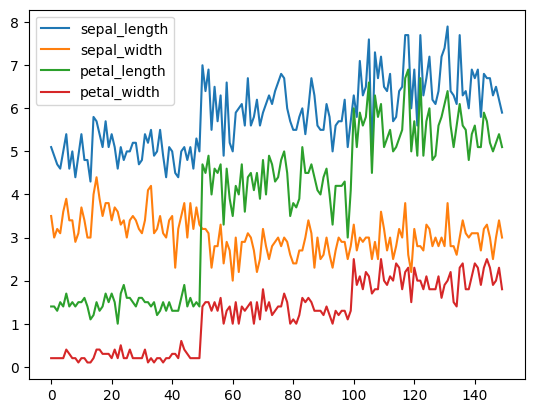

In [97]:

iris_df.plot()


<Axes: >

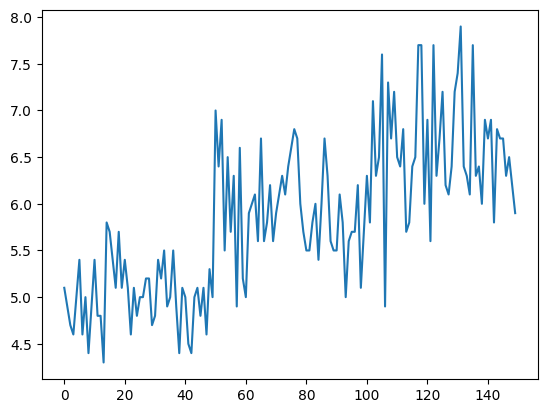

In [99]:
iris_df.sepal_length.plot()

<Axes: >

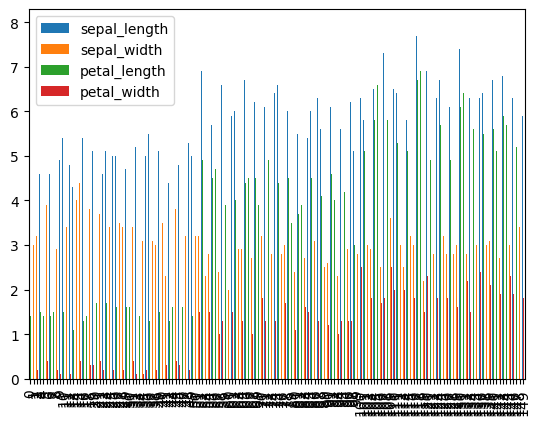

In [101]:
iris_df.plot.bar()

In [102]:
df2=pd.read_csv("salary_table.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'salary_table.csv'

In [103]:
# reading from csv file from a URL
import pandas as pd

raw_path_csv = "https://bitbucket.org/toarnabtrainer/aec_ml_python_jul_2025/raw/d1d098b3be9503c817923869d376c88224e4344d/Datafile/salary_table.csv"

try:
    print("reading the data from csv file from URL....")
    df2 = pd.read_csv(raw_path_csv)
except Exception as e:
    print(f"file access error: {e}")
    print("data file could not be read successfully....")
    df2 = None
else:
    print("Data file has been read successfully")

if df2 is not None:
    display(df2.head())
else:
    print("DataFrame is empty because the file could not be read.")

reading the data from csv file from URL....
Data file has been read successfully


,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


<Axes: >

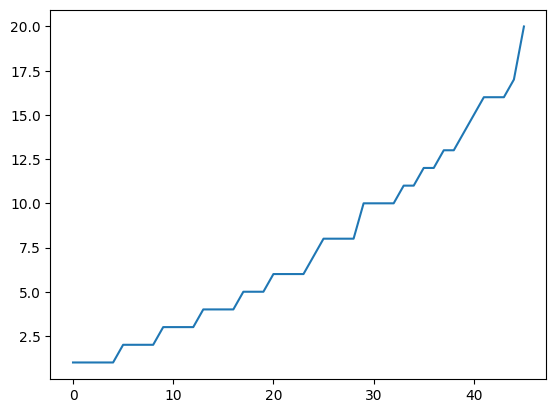

In [104]:
df2.experience.plot()

<Axes: >

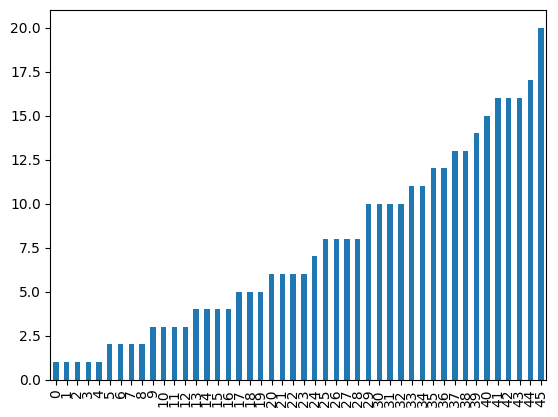

In [105]:
df2.experience.plot.bar()

<Axes: >

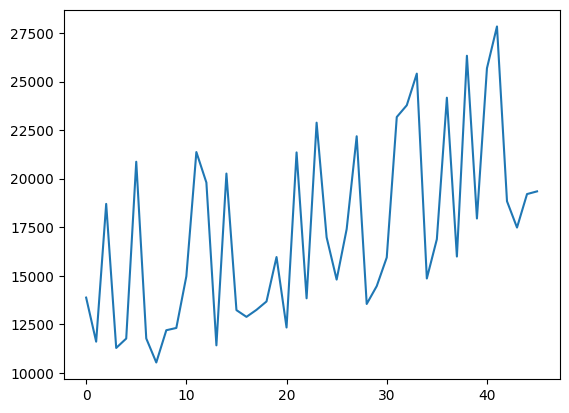

In [106]:
df2.salary.plot()

<Axes: ylabel='Frequency'>

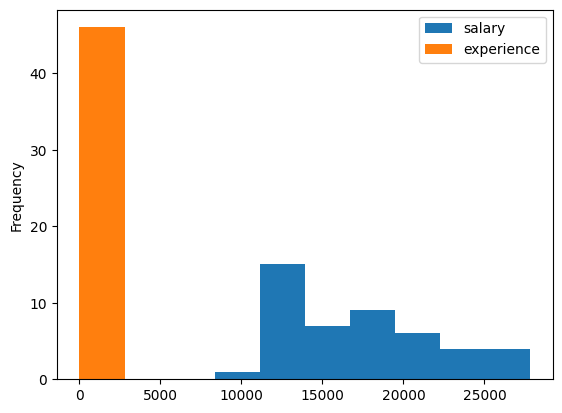

In [107]:
df2.plot.hist()

<Axes: ylabel='salary'>

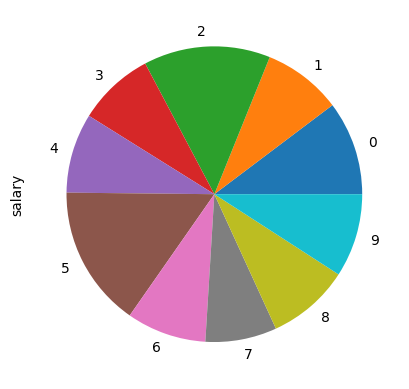

In [109]:
df2.salary.head(10).plot.pie()

<Axes: ylabel='salary'>

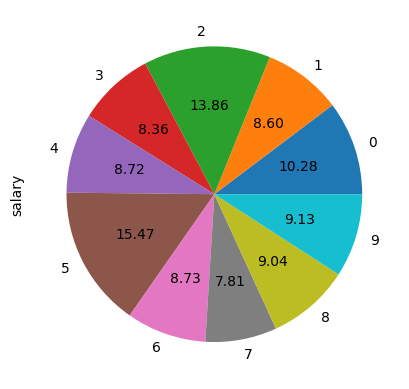

In [111]:
df2.salary.head(10).plot.pie(autopct= "%0.2f")

<Axes: >

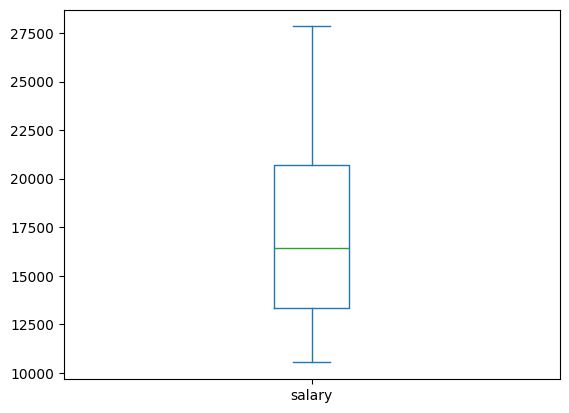

In [112]:
df2.salary.plot.box()

<Axes: title={'center': 'Experience(in Years) and Salary( in INR)'}, xlabel='experience', ylabel='salary'>

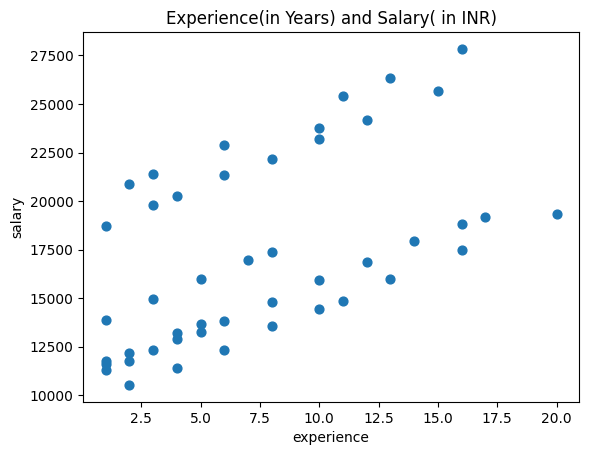

In [115]:
df2.plot(kind="scatter" ,x= "experience" , y = 'salary',s= 40,
         title ='Experience(in Years) and Salary( in INR)')

Basic Plots

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
x = np.linspace(0,10,50)
print(x[:10],len(x),type(x))

[0.         0.20408163 0.40816327 0.6122449  0.81632653 1.02040816
 1.2244898  1.42857143 1.63265306 1.83673469] 50 <class 'numpy.ndarray'>


In [121]:
sinus= np.sin(x)
print(sinus[:10],len(sinus),type(sinus))

[0.         0.20266794 0.39692415 0.57470604 0.72863478 0.85232157
 0.94063279 0.98990308 0.99808748 0.96484631] 50 <class 'numpy.ndarray'>


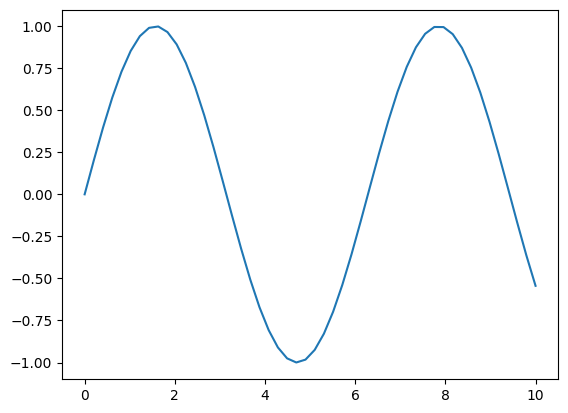

In [122]:
plt.plot(x,sinus)
plt.show()

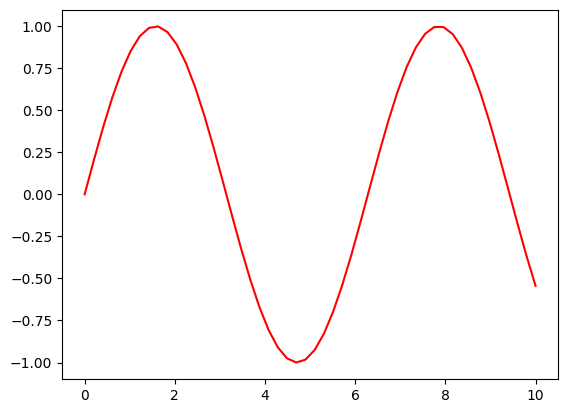

In [123]:
plt.plot(x,sinus,color='red')
plt.show()

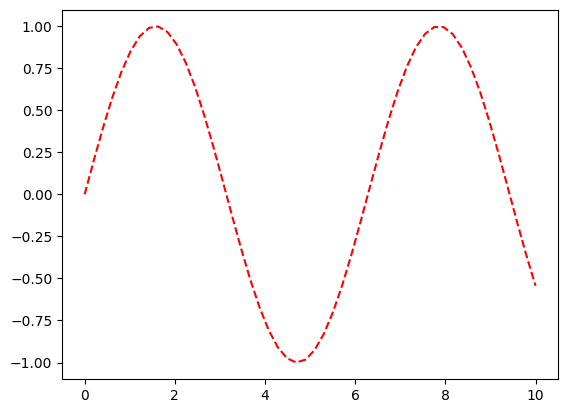

In [124]:
plt.plot(x,sinus,color='red',linestyle='--')
plt.show()

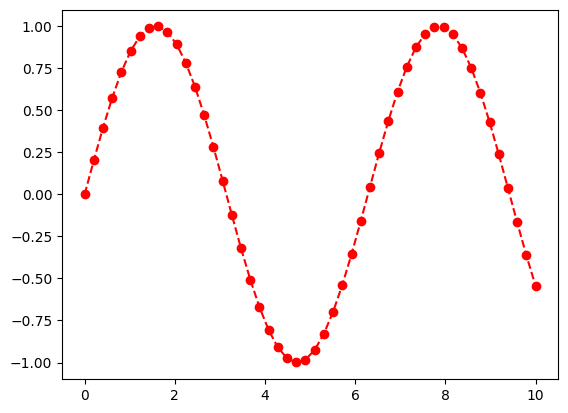

In [125]:
plt.plot(x,sinus,color='red',linestyle='--',marker='o')
plt.show()

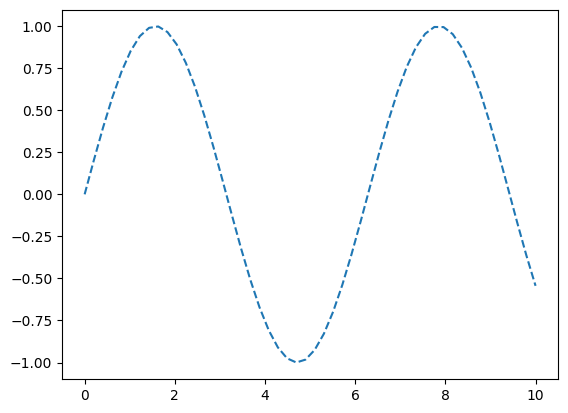

In [129]:
plt.plot(x,sinus,"--")
plt.show()

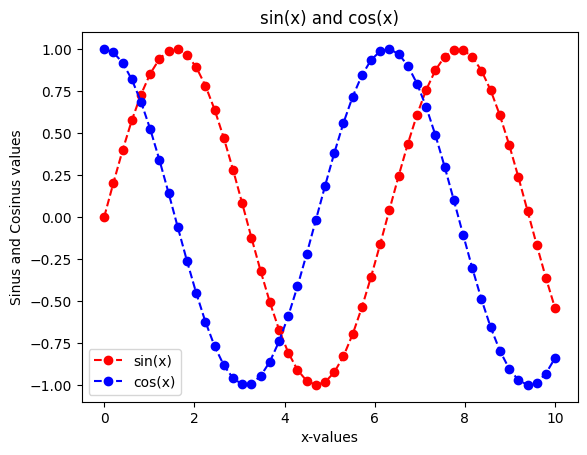

In [133]:
x=np.linspace(0,10,50)
sinus= np.sin(x)
cosinus= np.cos(x)
plt.plot(x,sinus,color='red',linestyle='--',marker='o',label='sin(x)')
plt.plot(x,cosinus,color='blue',linestyle='--',marker='o',label='cos(x)')
plt.xlabel('x-values')
plt.ylabel('Sinus and Cosinus values')
plt.title('sin(x) and cos(x)')
plt.legend()
plt.show()

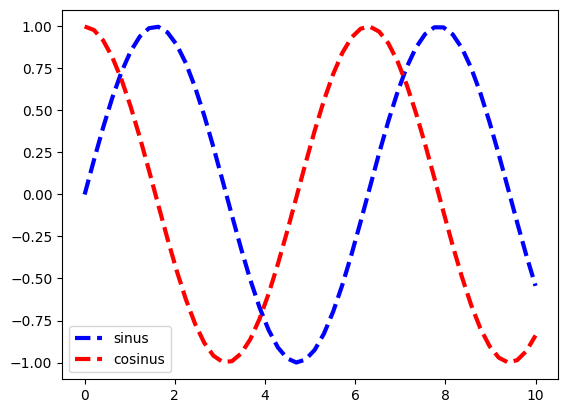

In [151]:
#step by step
plt.plot(x,sinus,label='sinus',color='blue',linestyle='--',linewidth=3)
plt.plot(x,cosinus,label='cosinus',color='red',linestyle='--',linewidth=3)
plt.legend()
plt.show()

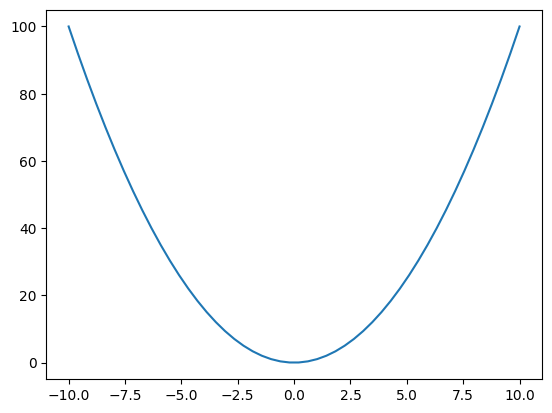

In [152]:
x=np.linspace(-10,10,50)
y=x**2
plt.plot(x,y)
plt.show()

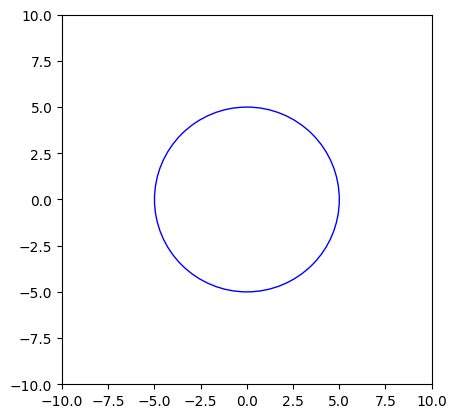

In [156]:
x=np.linspace(-10,10,100)

circle = plt.Circle((0, 0), radius=5, color='blue', fill=False)


ax = plt.gca()
ax.add_patch(circle)


ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_aspect('equal', adjustable='box') # Keep the aspect ratio square

plt.show()

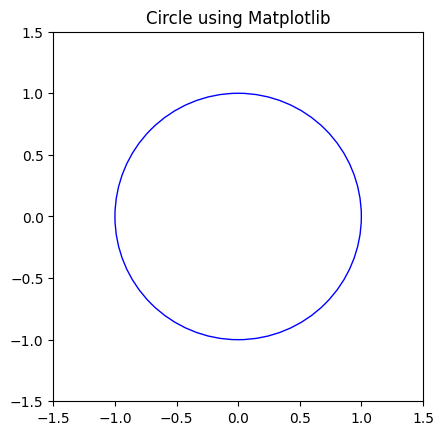

In [154]:

circle = plt.Circle((0, 0), radius=1, color='blue', fill=False)


ax = plt.gca()
ax.add_patch(circle)


ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_aspect('equal', adjustable='box')


plt.title('Circle using Matplotlib')
plt.show()

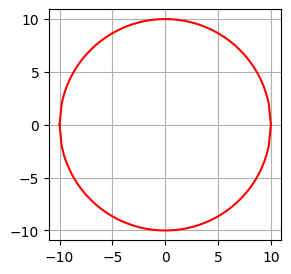

In [162]:

r = 10
x = np.linspace(-10, 10, 100)
y = np.sqrt(r**2 - x**2)
plt.figure(figsize=(3,3))
plt.grid(True)
plt.plot(x, y, '-r')
plt.plot(x, -y, '-r')
plt.axis('equal')
plt.show()

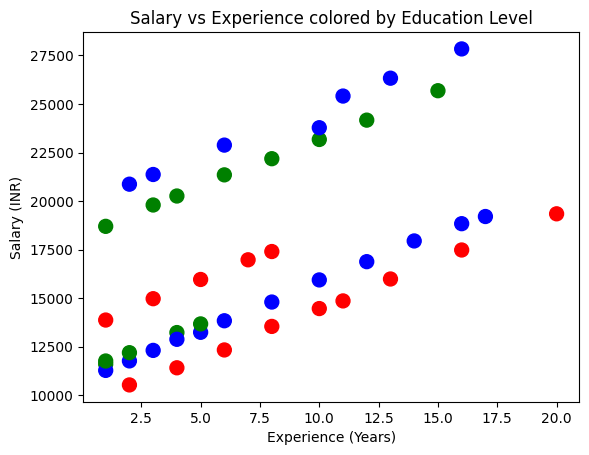

In [168]:
colors={'Bachelor':'red','Master':'blue','Ph.D':'green'}
plt.scatter(df2.experience, df2.salary, c=df2.education.apply(lambda c: colors[c]),s=100)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (INR)')
plt.title('Salary vs Experience colored by Education Level')
plt.show()